# **Predict the Success of Bank telemarketing**

In [ ]:
# Importlibraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Import data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:

# Apply feature engineering
train = create_features(train)

# Split features and target
X = train.drop(columns=['target', 'year'])
y = (train['target'] == 'yes').astype(int)



# **Exploratory Data Analysis**

<ipython-input-102-6644833ec33c>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


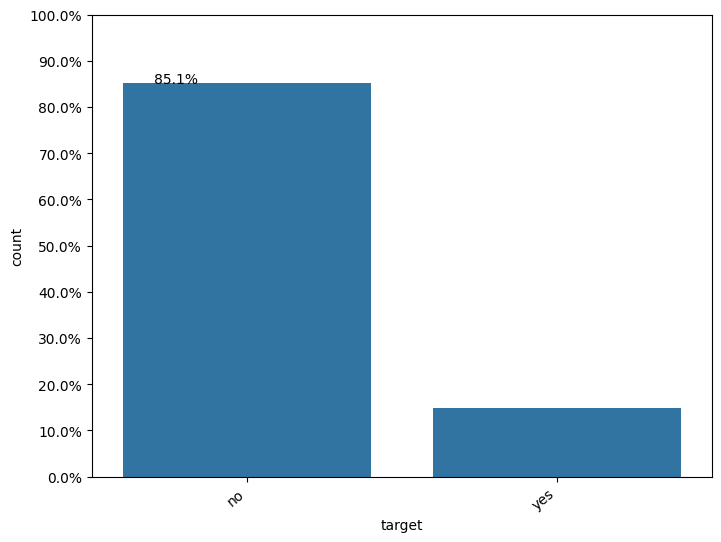

<ipython-input-102-6644833ec33c>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


In [ ]:
#Distribution of class variable

plt.figure(figsize=(8,6))
Y = train["target"]
total = len(Y)*1.
ax=sns.countplot(x="target", data=train)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [ ]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = train[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [ ]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = train[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="target")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

<ipython-input-103-885457261440>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


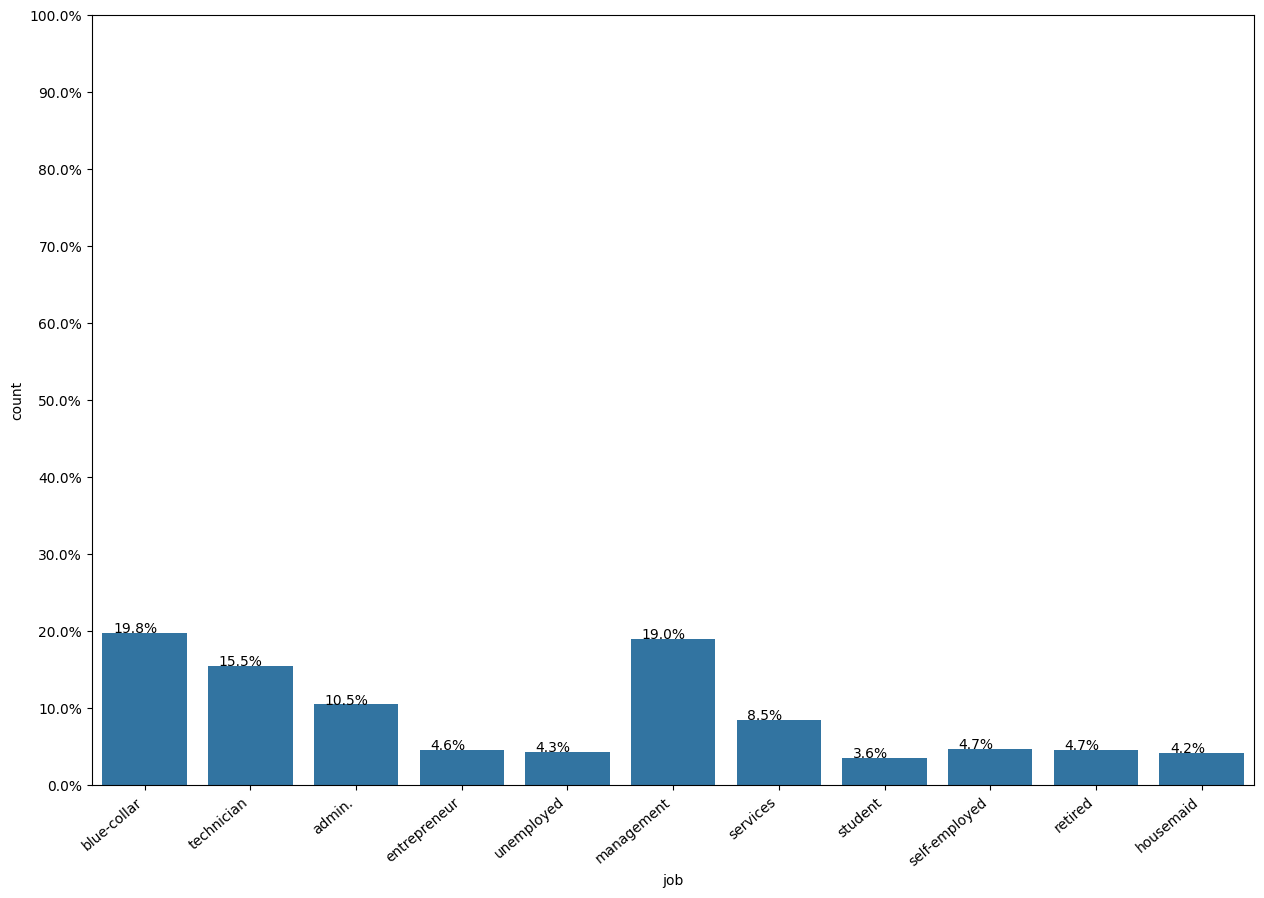

In [ ]:
countplot("job", train)

<ipython-input-104-68a9d6f71b29>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


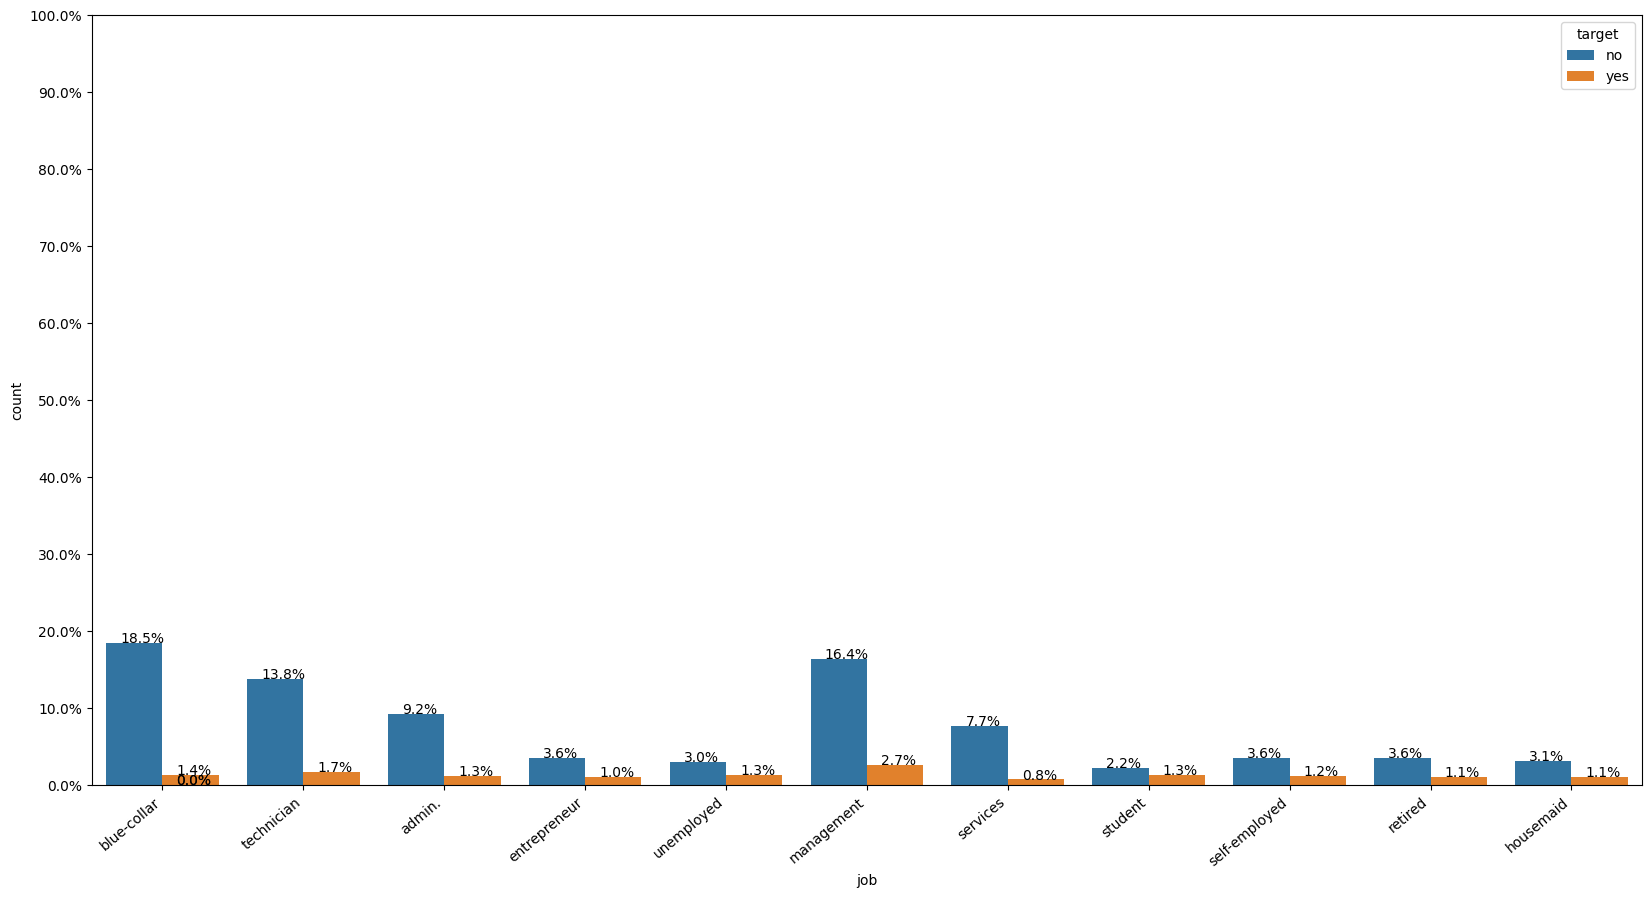

In [ ]:
countplot_withY("job", train)

<ipython-input-103-885457261440>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


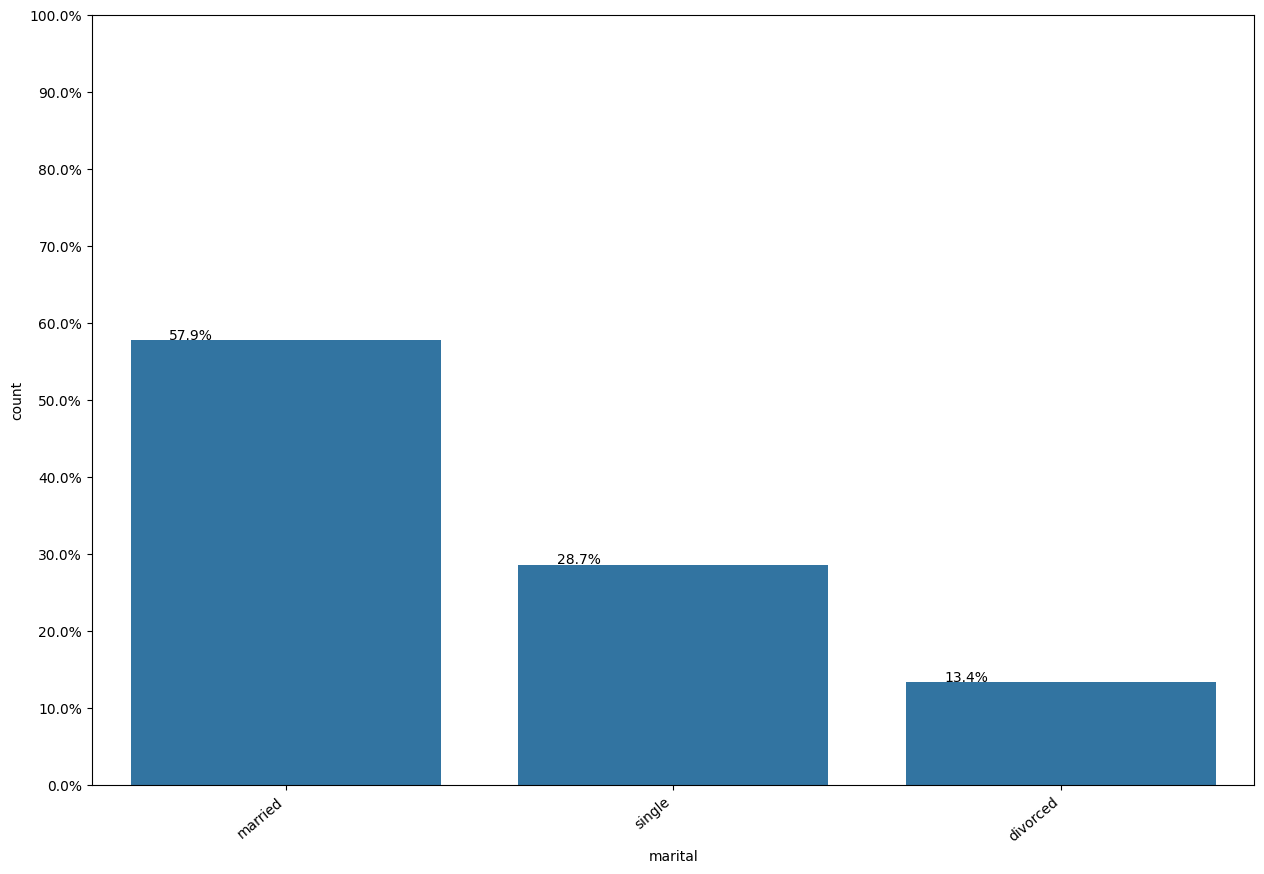

In [ ]:
countplot("marital", train)

<ipython-input-104-68a9d6f71b29>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


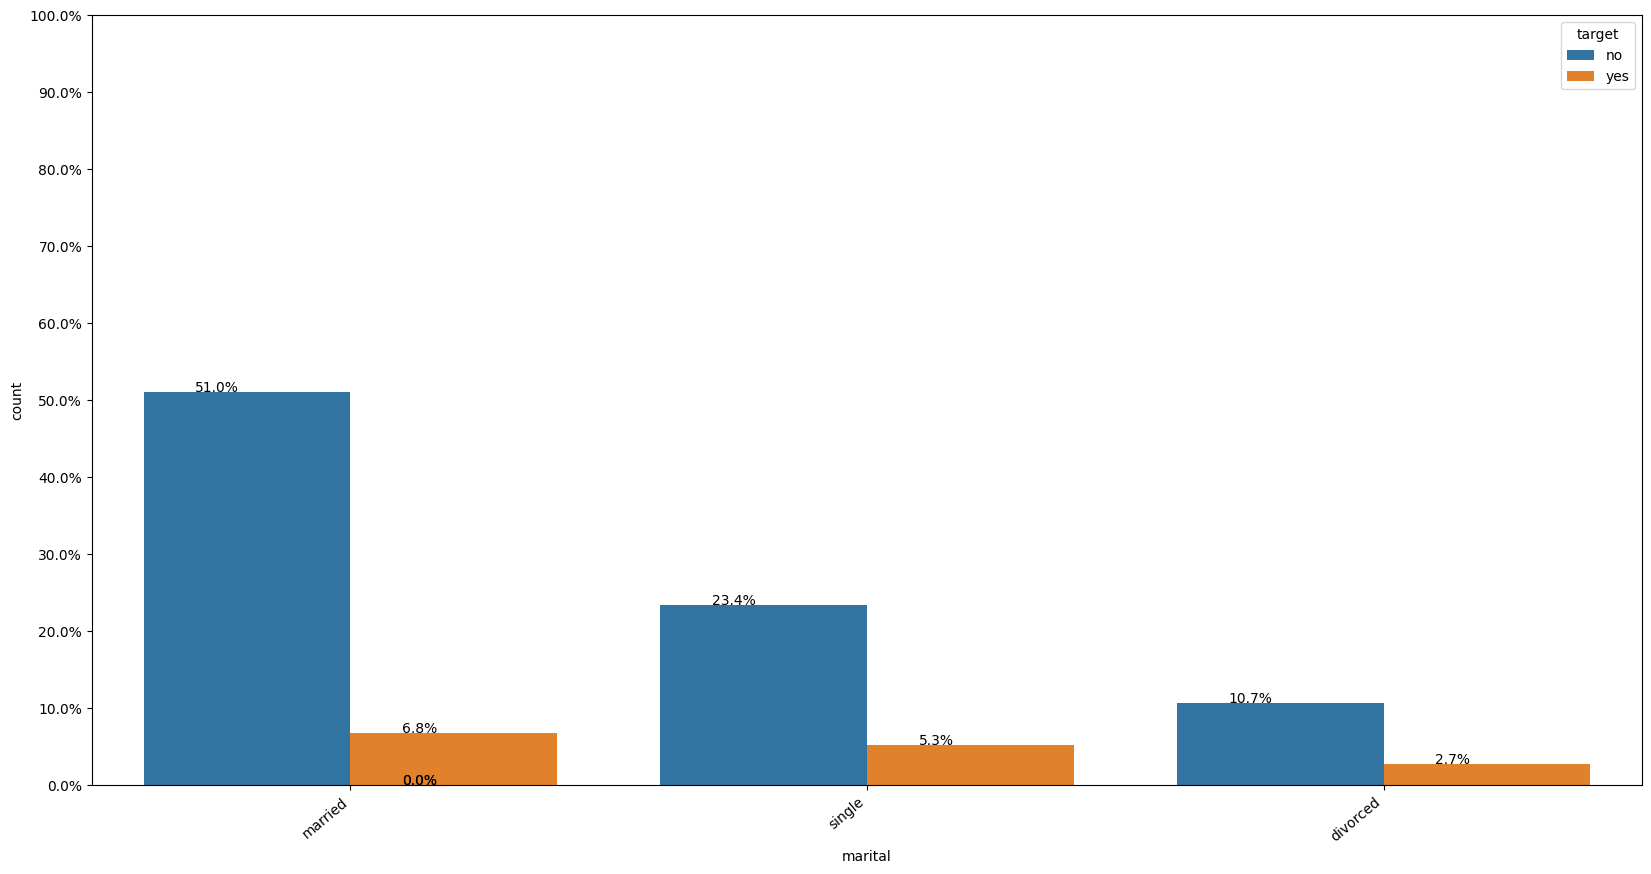

In [ ]:
countplot_withY("marital", train)

<ipython-input-103-885457261440>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


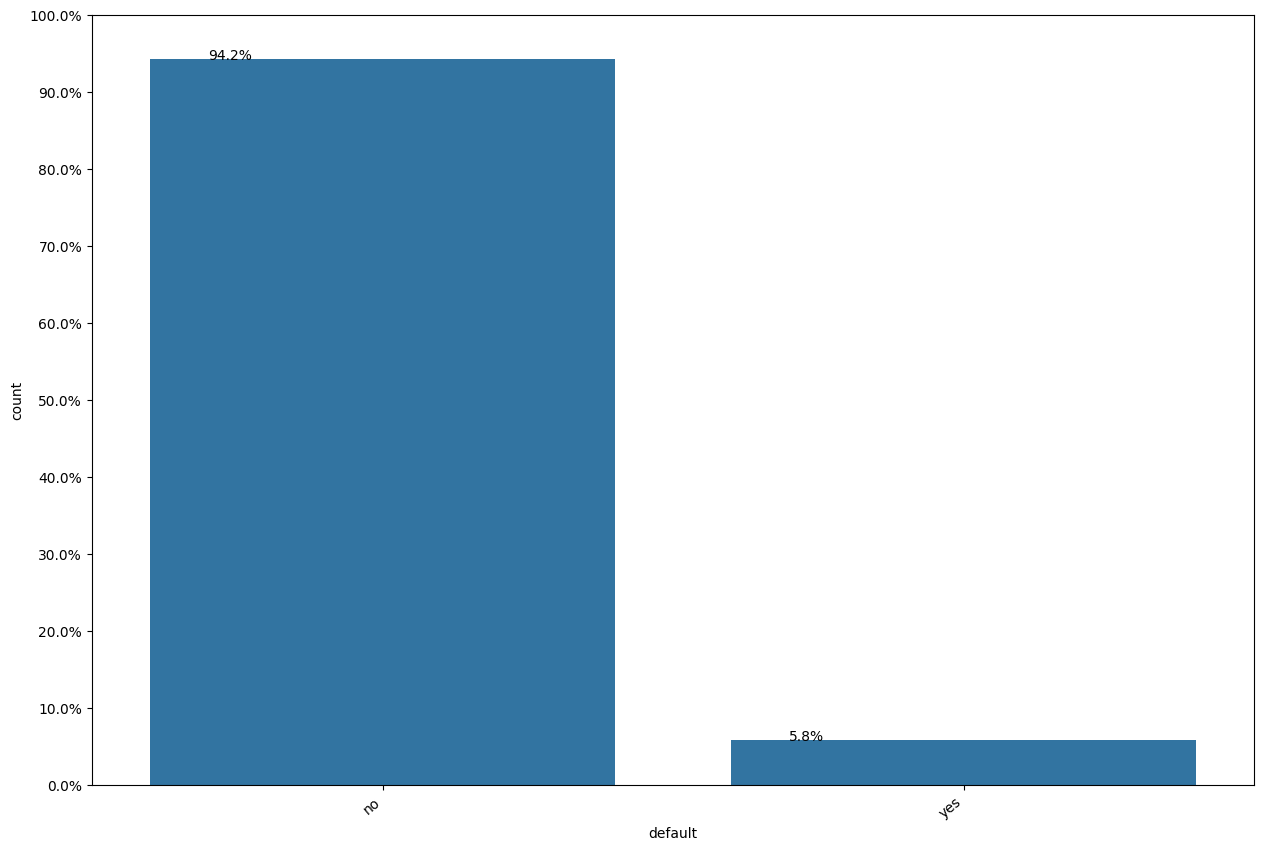

In [ ]:
countplot("default", train)

<ipython-input-104-68a9d6f71b29>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


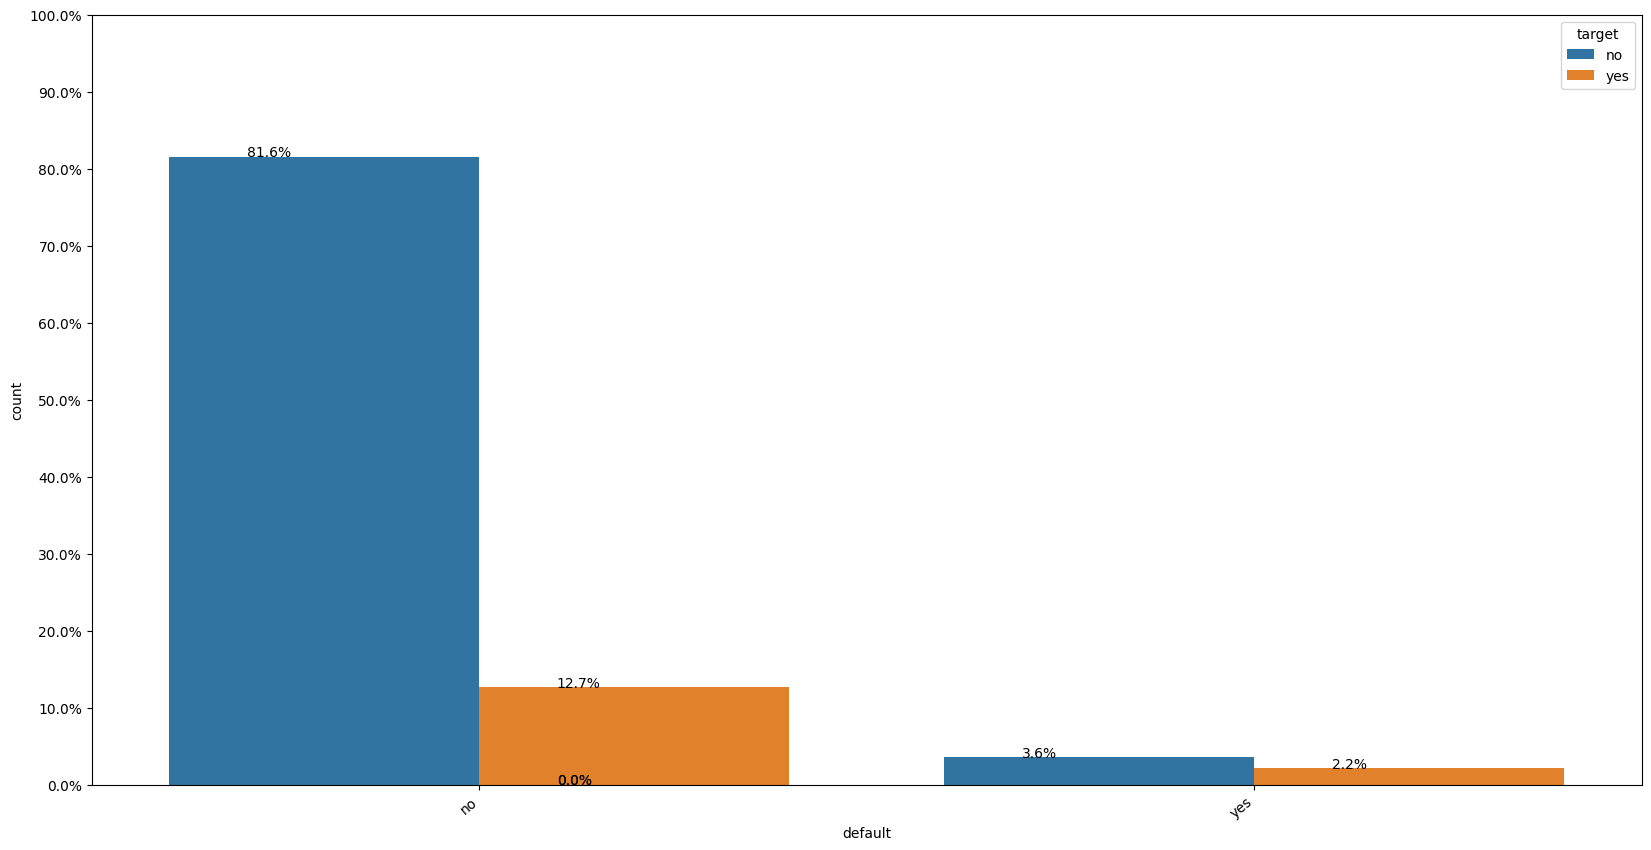

In [ ]:
countplot_withY("default", train)

<ipython-input-103-885457261440>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


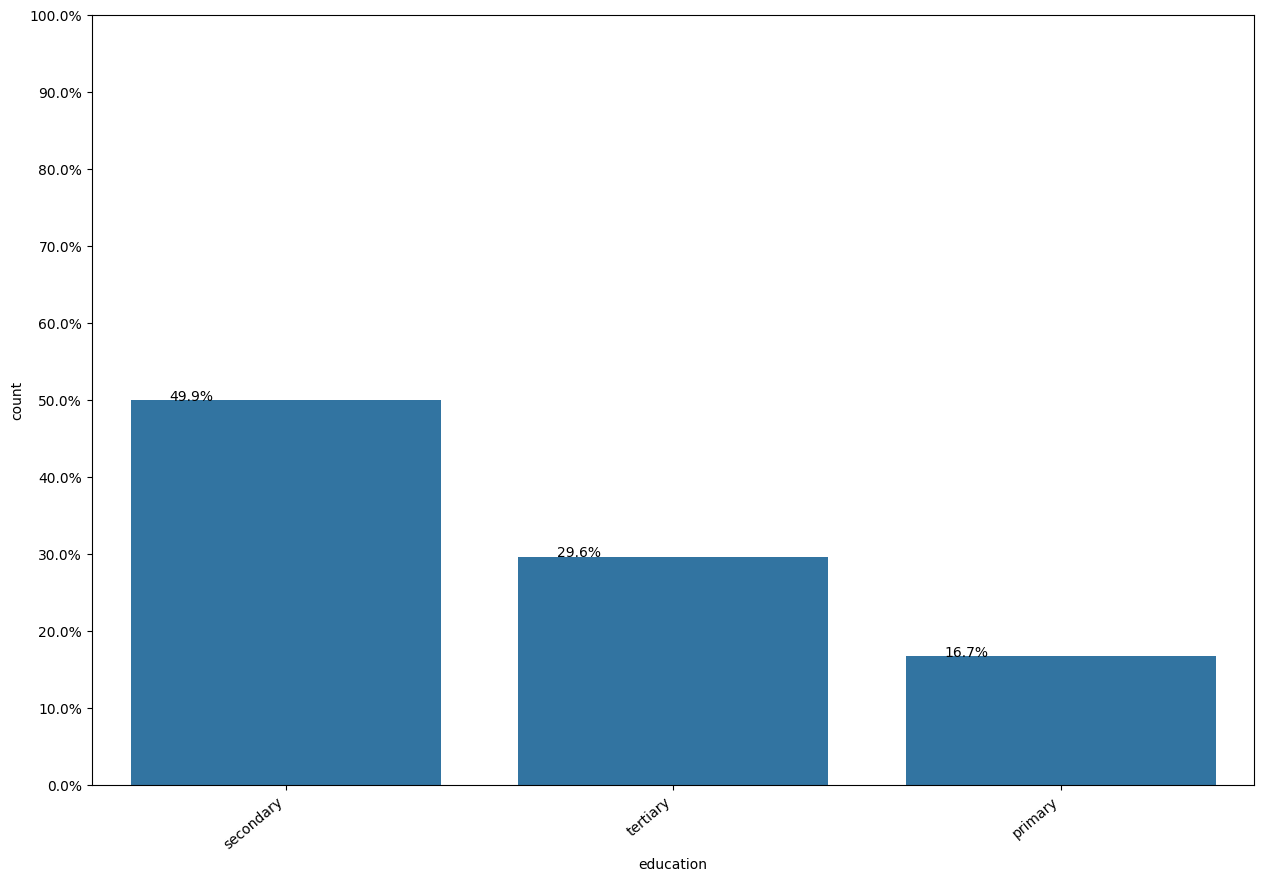

In [ ]:
countplot("education",train)

<ipython-input-104-68a9d6f71b29>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


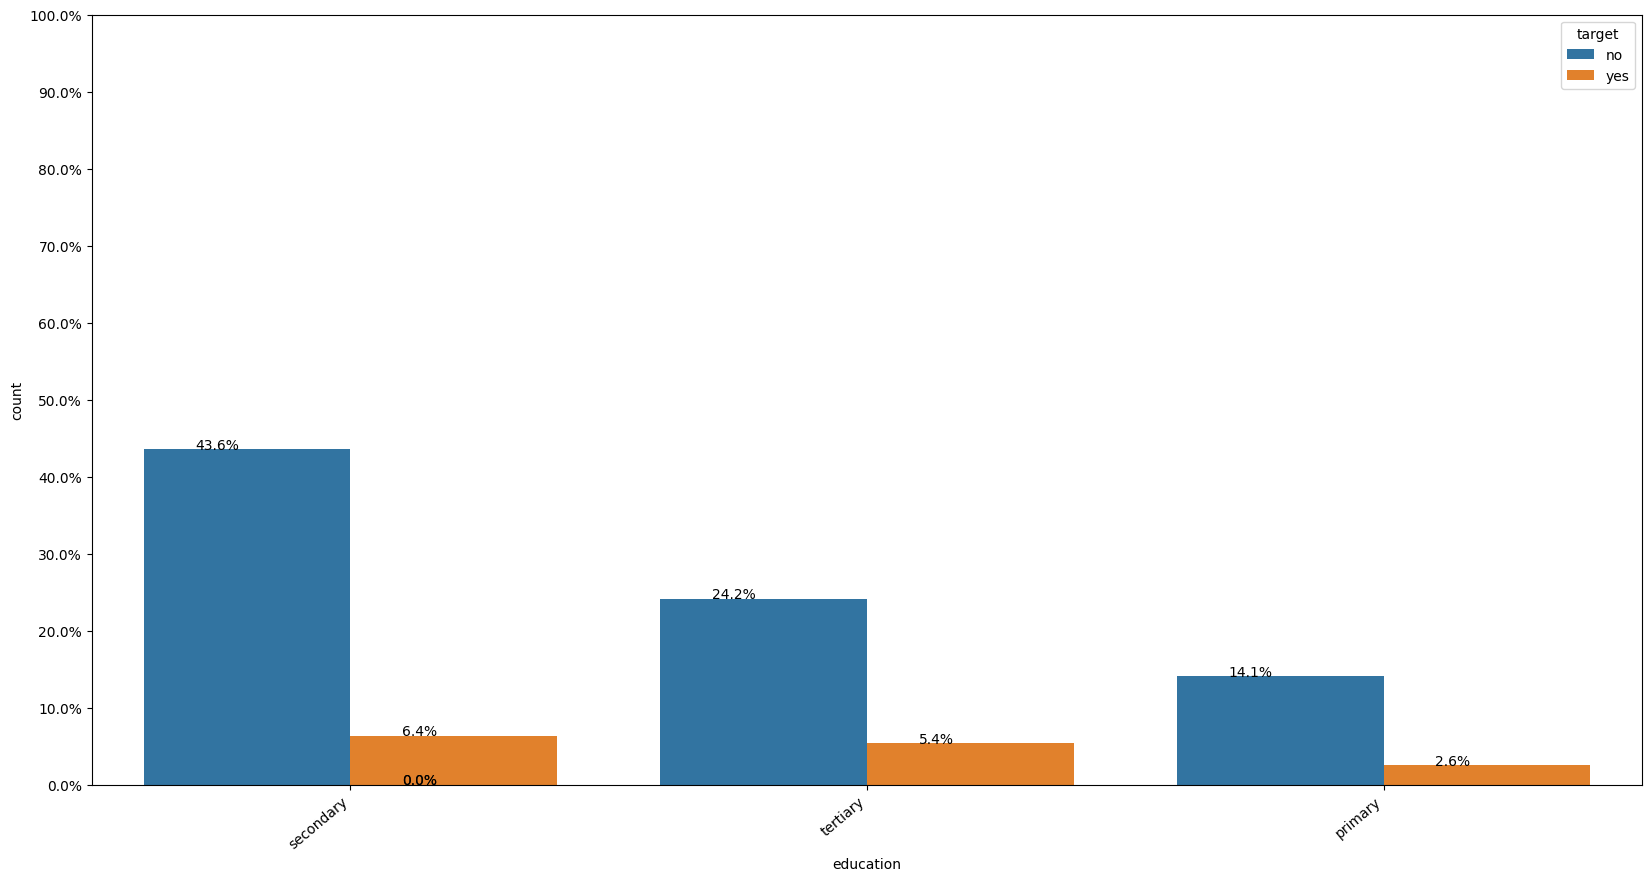

In [ ]:
countplot_withY("education", train)

<ipython-input-103-885457261440>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


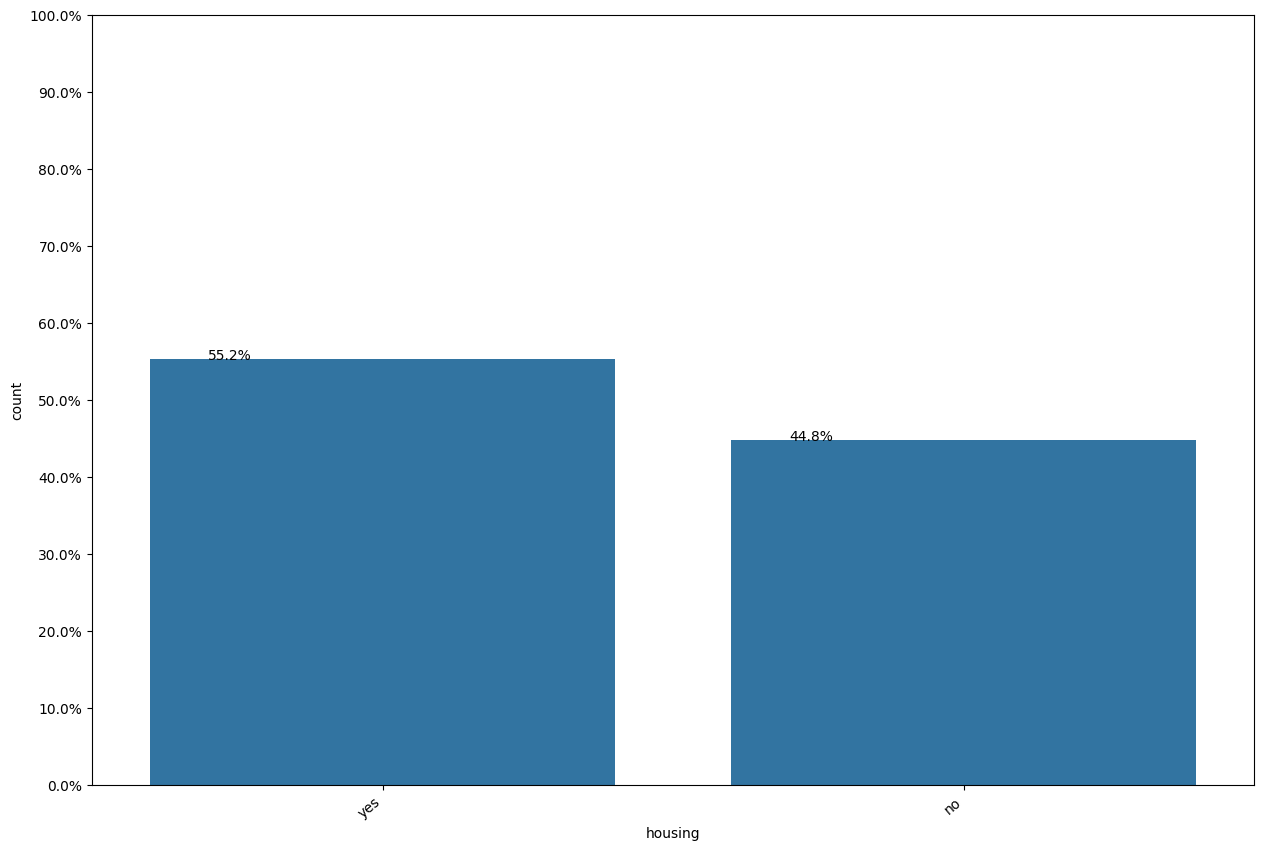

In [ ]:
countplot("housing", train)

<ipython-input-104-68a9d6f71b29>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


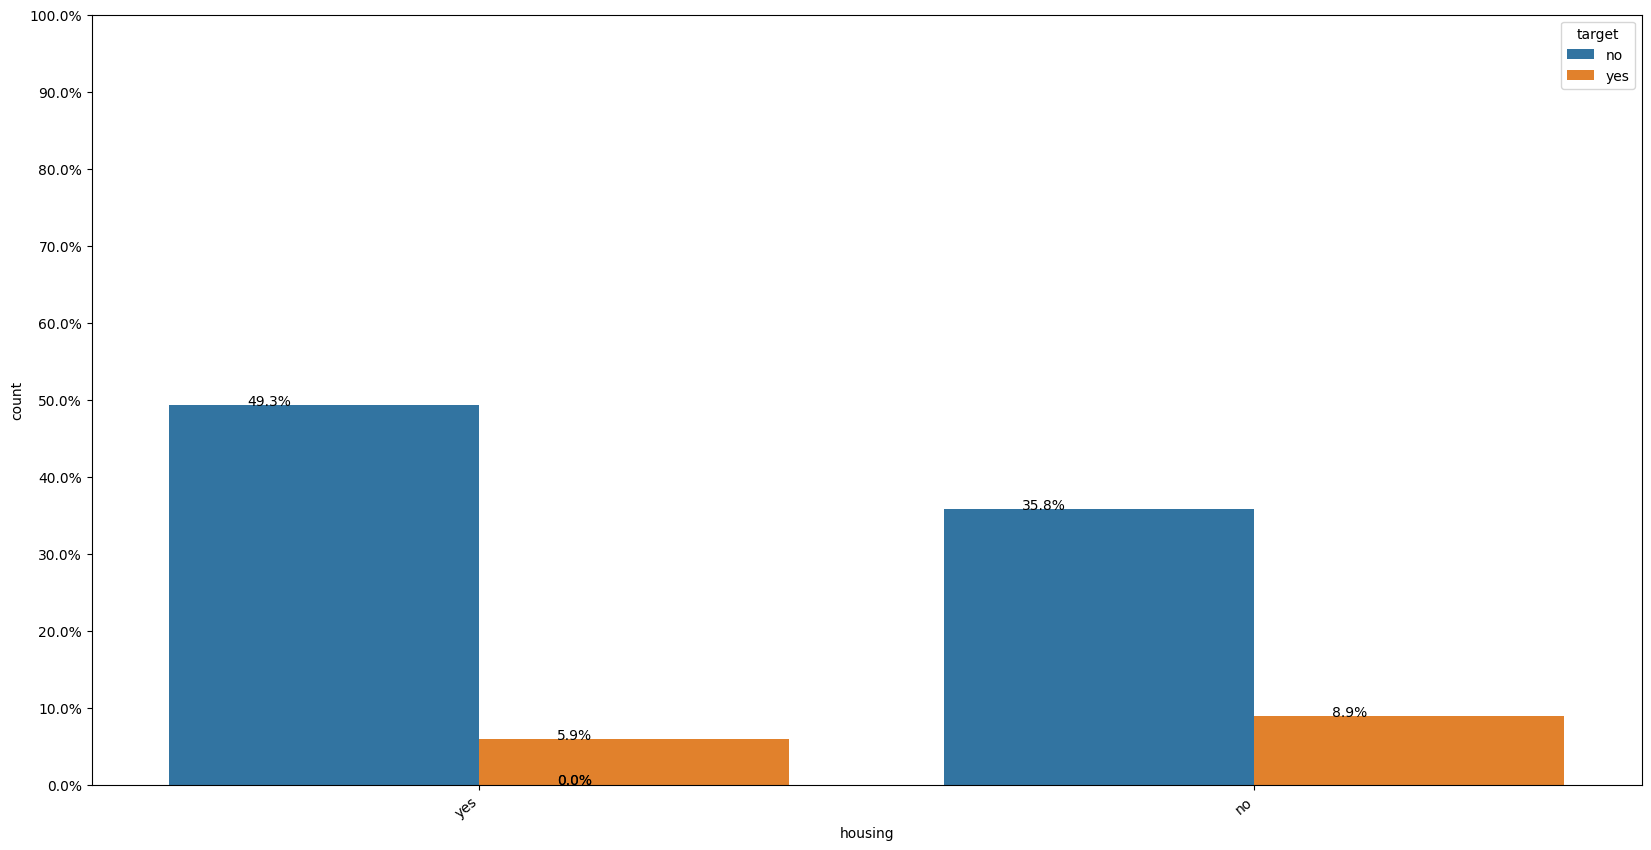

In [ ]:
countplot_withY("housing", train)

<ipython-input-103-885457261440>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


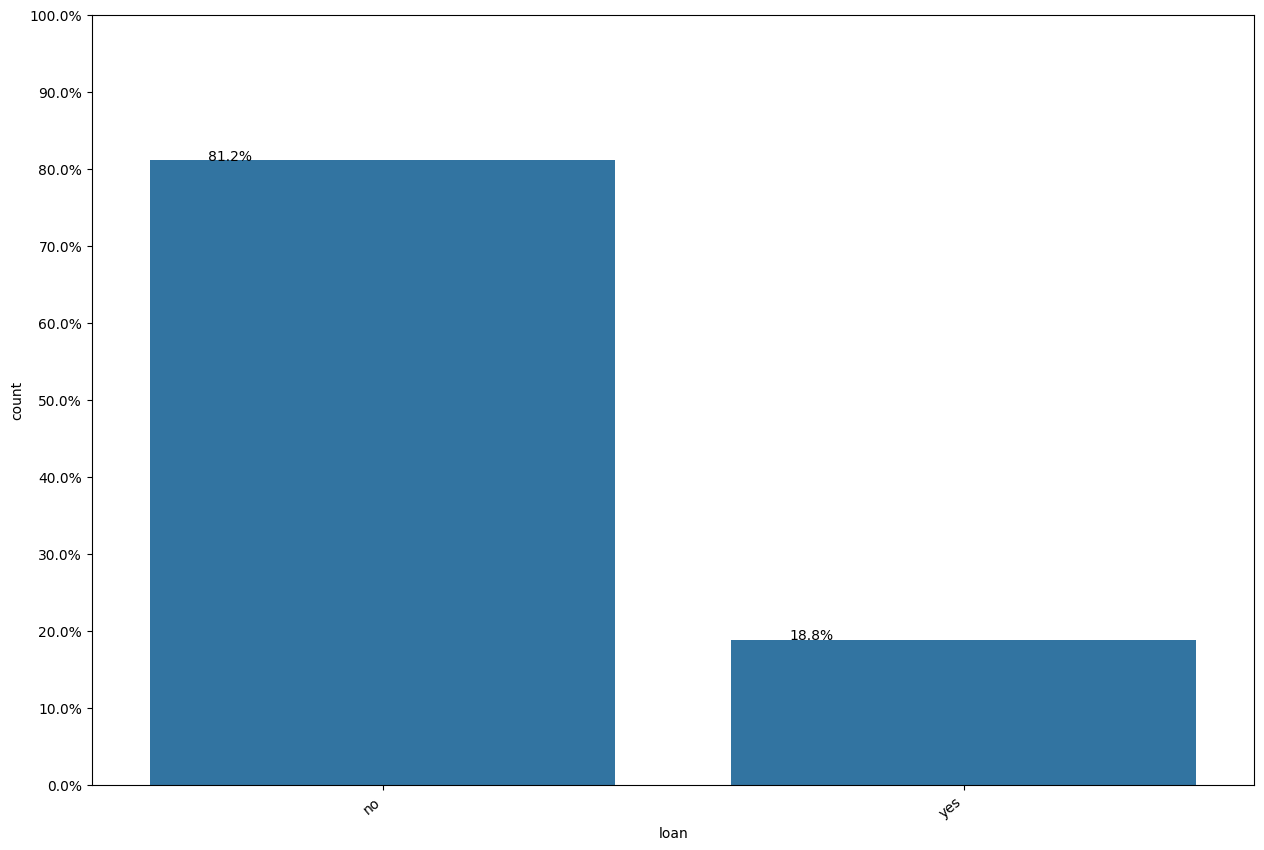

In [ ]:
countplot("loan", train)

<ipython-input-104-68a9d6f71b29>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


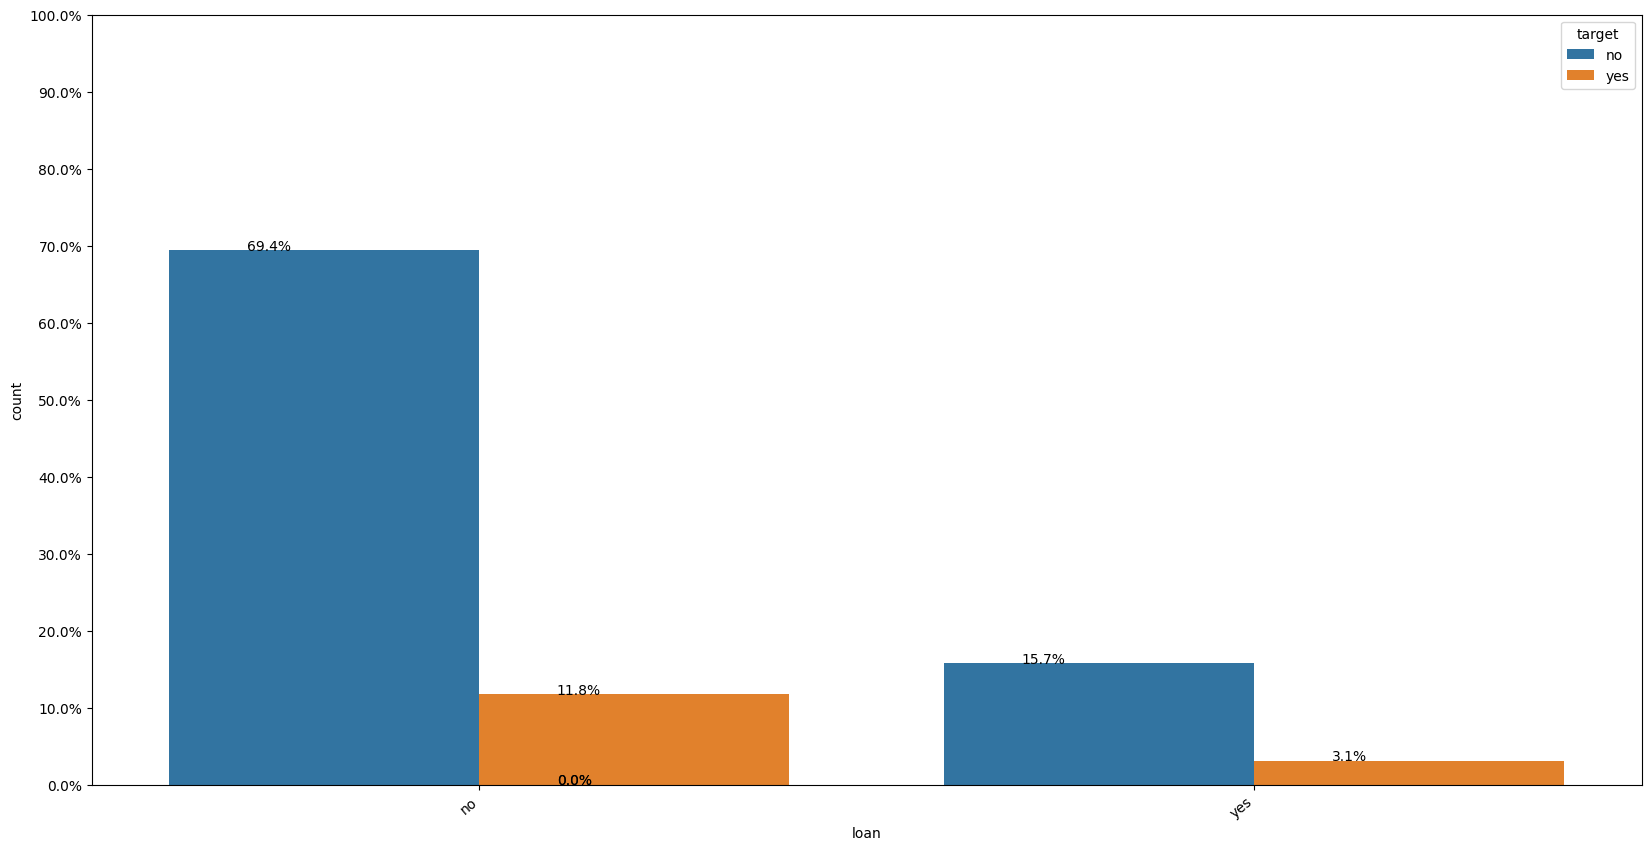

In [ ]:
countplot_withY("loan", train)

<ipython-input-103-885457261440>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


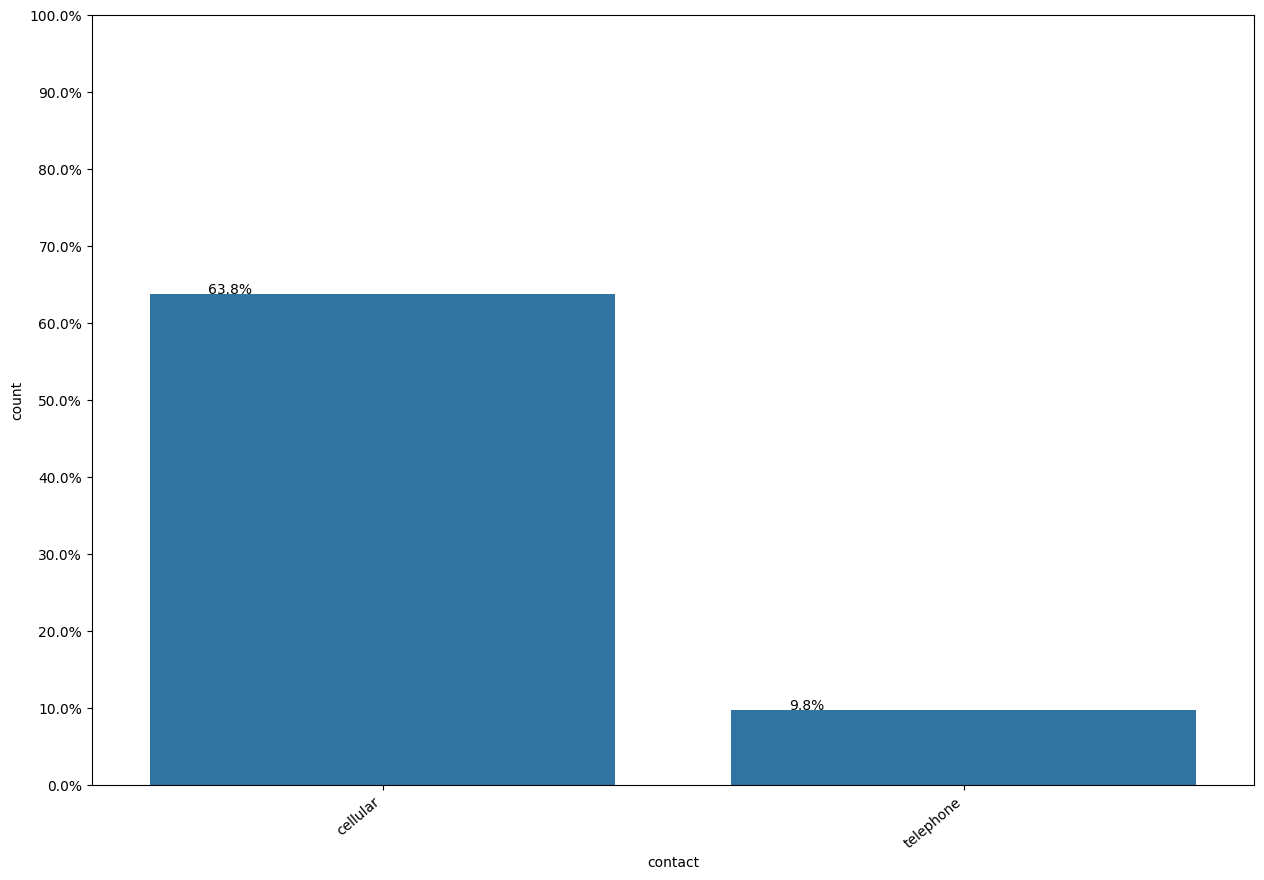

In [ ]:
countplot("contact", train)

<ipython-input-104-68a9d6f71b29>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


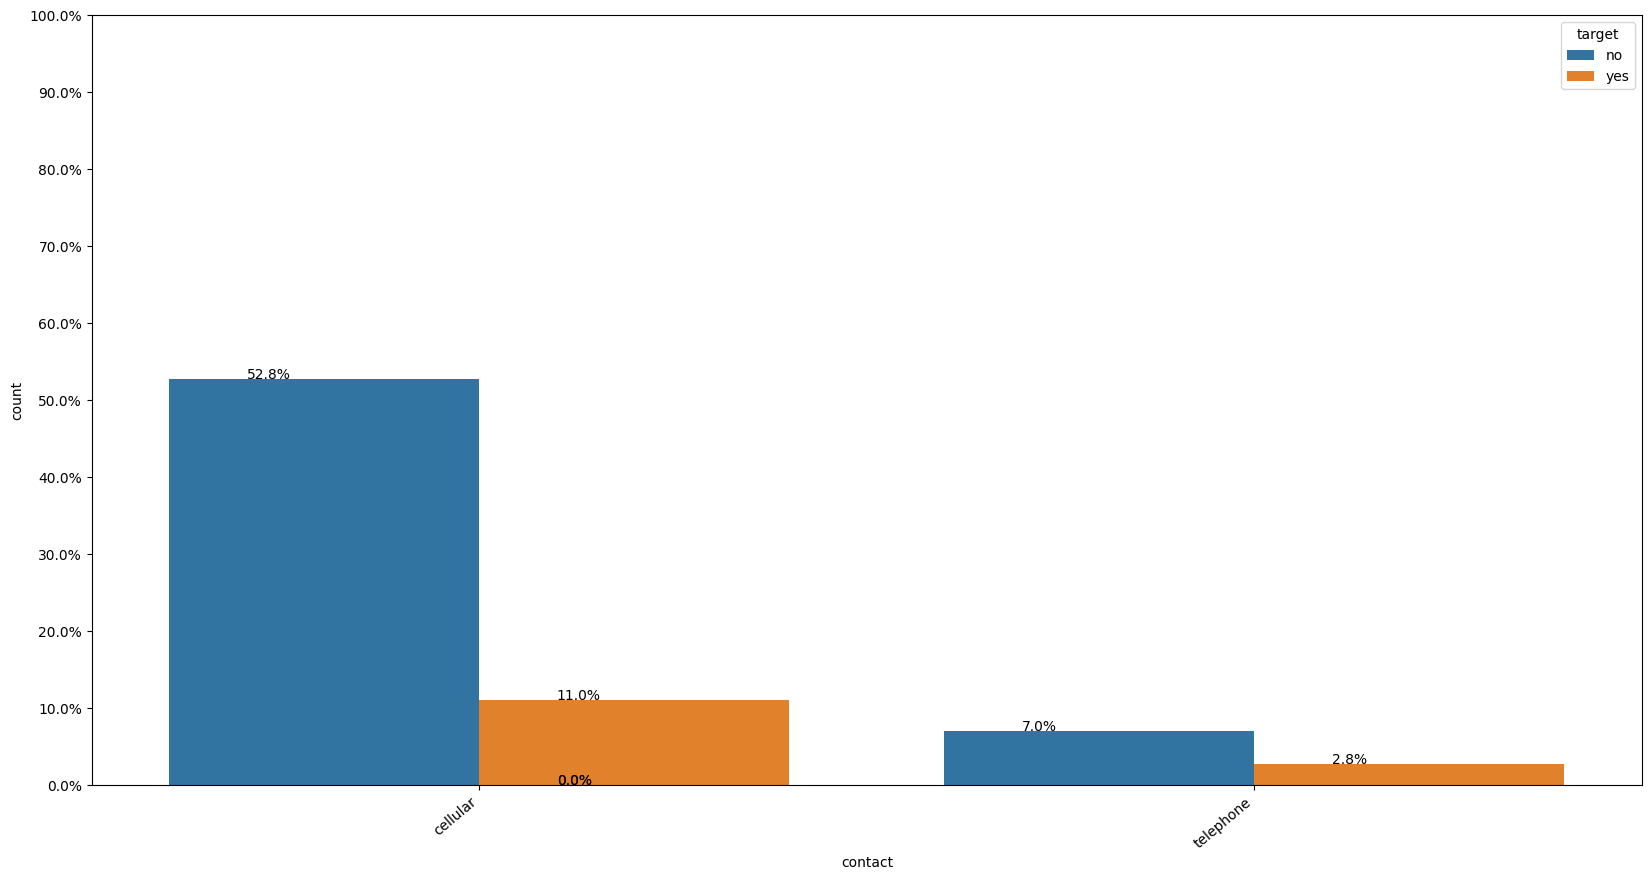

In [ ]:
countplot_withY("contact", train)

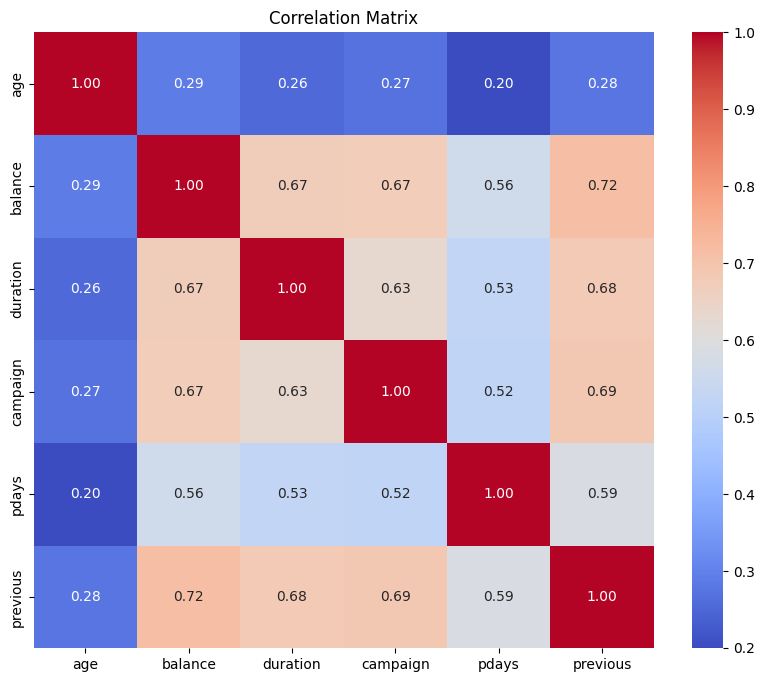

In [ ]:

# Select the relevant columns for the correlation matrix
cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
correlation_matrix = train[cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap above visualizes the correlation matrix of several numerical features from the dataset, with correlation values ranging from -1 (strong negative correlation) to +1 (strong positive correlation).

Key Observations:

**Highly Correlated Features:**

Balance and Duration: Strong positive correlation (0.67) suggests that as the balance increases, the duration of interaction tends to increase.
Balance and Previous: Strong correlation (0.72) implies individuals with higher balances are likely to have more previous engagements with the bank.
Duration and Campaign: Significant positive correlation (0.63) indicates longer durations tend to coincide with higher campaign activity.
Previous and Balance: Highest positive correlation (0.72) in the matrix, showing strong interdependence.

**Moderate Correlations:**

Pdays and Balance (0.56) and Pdays and Duration (0.53) suggest moderate relationships between the days since the previous campaign and these features.

Other pairwise relationships like Campaign and Previous (0.69) also show moderate dependency.

**Weak Correlations:**

Age shows relatively weaker correlations with all other features, the highest being with Balance (0.29) and Previous (0.28).

**Insights:**

Features such as Balance, Duration, Campaign, and Previous are tightly interlinked, indicating potential redundancies or multicollinearity.
Age has weaker relationships, suggesting it may contribute less directly to the variability explained by other features.
If used in machine learning models, high correlations might necessitate techniques like dimensionality reduction (PCA) or regularization to address multicollinearity.

In [1]:
# Define feature engineering function
def create_features(df):
    # Create copy to avoid modifying original data
    df = df.copy()

    # Create age groups
    df['age_group'] = pd.cut(df['age'],
                            bins=[0, 20, 30, 40, 50, 60, 100],
                            labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

    # Create balance groups
    df['balance_group'] = pd.qcut(df['balance'], q=5, labels=['very_low', 'low', 'medium', 'high', 'very_high'])

    # Create campaign intensity feature (handle division by zero)
    df['campaign_intensity'] = df['campaign'] / (df['pdays'].replace(-1, 999) + 1)
    df['campaign_intensity'] = df['campaign_intensity'].clip(upper=df['campaign_intensity'].quantile(0.99))

    # Create contact rate (handle division by zero)
    df['contact_rate'] = df['previous'] / (df['pdays'].replace(-1, 999) + 1)
    df['contact_rate'] = df['contact_rate'].clip(upper=df['contact_rate'].quantile(0.99))

    # Create interaction features
    df['age_balance'] = df['age'] * df['balance']
    df['age_balance'] = df['age_balance'].clip(upper=df['age_balance'].quantile(0.99))

    df['duration_campaign'] = df['duration'] * df['campaign']
    df['duration_campaign'] = df['duration_campaign'].clip(upper=df['duration_campaign'].quantile(0.99))

    # Replace any remaining infinities with NaN (will be handled by imputer)
    df = df.replace([np.inf, -np.inf], np.nan)

    return df

**Description of feature engineering**

Creates a new categorical feature 'age_group' by binning the 'age' column into six age ranges (0-20, 21-30, ..., 60+). This transforms a numerical feature into a categorical one.
Creates a new categorical feature 'balance_group' by dividing the 'balance' column into five quantiles (very_low, low, medium, high, very_high).  This converts a numerical feature into ordinal categories based on the distribution of the 'balance'.

 It represents the number of contacts performed during a campaign relative to the number of days that passed by after the client was last contacted. It replaces -1 values in `pdays` (likely indicating no previous contact) with 999 to avoid division by zero, though 999 might be too large a value. The `clip` function is then applied to set an upper bound on the values of 'campaign_intensity', restricting extremely large values.

Similar to 'campaign_intensity,' this creates a 'contact_rate' feature, but based on the number of previous contacts. Again, a large value (999) replaces -1 in `pdays` and `clip` sets an upper bound.

Creates an interaction feature 'age_balance', which is the product of 'age' and 'balance'.  Interaction features capture relationships between two or more original features.Similar interaction feature representing the product of 'duration' and 'campaign'.  Both interaction features have an upper bound.

Replaces any infinite values (which might have arisen from divisions by zero or other numerical operations) with NaN (Not a Number).  This is important as many machine learning models cannot handle infinite values, but NaN values can typically be handled by imputation.

This function aims to enhance the predictive power of a model by creating new features from existing ones. These engineered features capture various relationships and potentially reveal hidden patterns in the data, such as the intensity of marketing campaigns, contact rates, and combined effects of age and balance.  The use of quantiles and clipping helps prevent outliers from disproportionately affecting the model.




In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define column groups
num = ['age', 'previous', 'pdays', 'duration', 'balance',
       'campaign_intensity', 'contact_rate', 'age_balance', 'duration_campaign']
ordinal_cat = ['education']
nominal_cat = ['marital', 'housing', 'loan', 'default', 'weekday', 'contact',
               'job', 'poutcome', 'age_group', 'balance_group']

In [ ]:
# Create pipelines
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]))
])

nominal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_pipe, num),
        ('ordinal', ordinal_pipe, ordinal_cat),
        ('nominal', nominal_pipe, nominal_cat)
    ],
    remainder='passthrough'
)

In [ ]:
# Fit preprocessor and transform data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# **Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression
X = train.drop(columns=['target', 'year', 'month', 'weekday'])
y = (train['target'] == 'yes').astype(int)


# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter
logreg_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_transformed)

# Evaluate the model
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.61      0.27      0.37      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.62      0.65      7843
weighted avg       0.84      0.87      0.84      7843



The model performs very well for the negative class (Class 0) due to its dominance in the dataset (6677 samples vs. 1166 for Class 1).
However, the positive class (Class 1) suffers from low recall and F1-score, highlighting the model's inability to effectively identify minority instances.

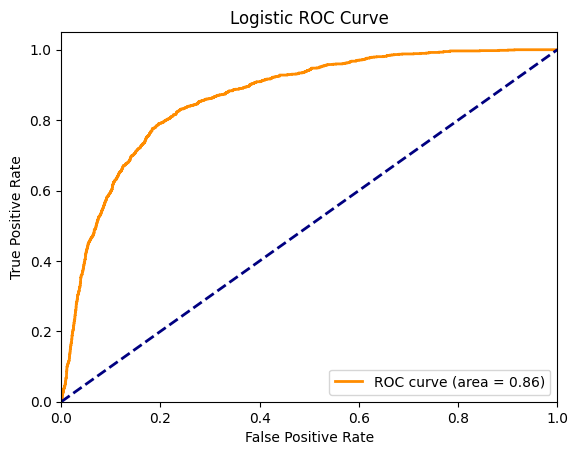

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, logreg_model.predict_proba(X_test_transformed)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic ROC Curve')
plt.legend(loc="lower right")
plt.show()

Here, with an AUC of 0.86, the model is considered good at distinguishing between classes.

# **Random Forest**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      6677
           1       0.59      0.42      0.49      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.68      0.71      7843
weighted avg       0.86      0.87      0.86      7843



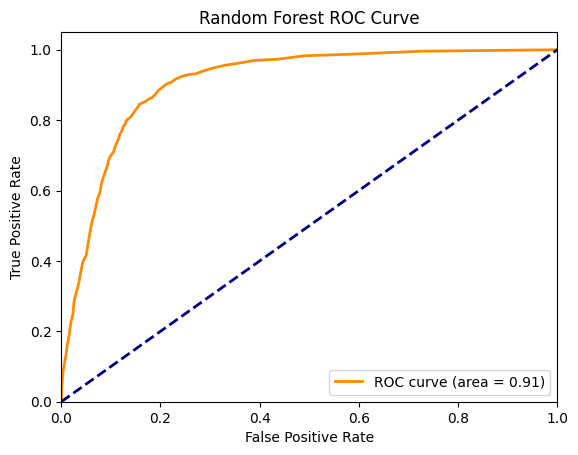

In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_transformed, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_transformed)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test_transformed)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

Compared to the XGBoost report, the Random Forest seems to have slightly lower precision, recall, and F1-Score for Class 1, suggesting XGBoost may handle the minority class better.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:26:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6677
           1       0.61      0.46      0.52      1166

    accuracy                           0.87      7843
   macro avg       0.76      0.70      0.72      7843
weighted avg       0.86      0.87      0.87      7843



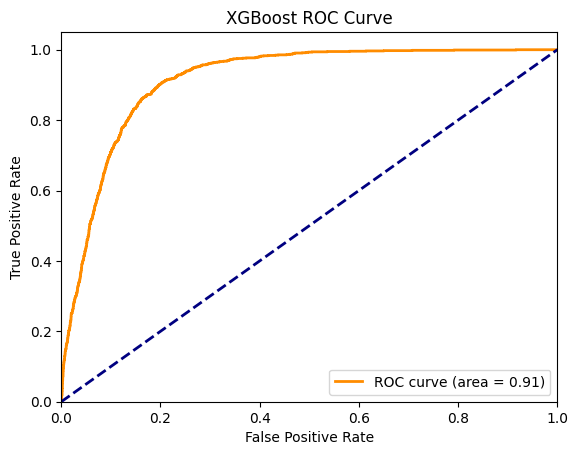

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Fit the randomized search to the data
random_search.fit(X_train_transformed, y_train)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_xgb = best_xgb_model.predict(X_test_transformed)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

# Compute ROC curve and ROC area
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test_transformed)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
lw = 2
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

Precision: 0.76, Recall: 0.70, F1-Score: 0.72 – Indicates a modest average performance across both classes, treating them equally regardless of support.

In [ ]:
 # Process test data similarly to training data
test['last contact date'] = pd.to_datetime(test['last contact date'])
test['year'] = test['last contact date'].dt.year
test['month'] = test['last contact date'].dt.month
test['weekday'] = test['last contact date'].dt.weekday
test.drop(columns=['last contact date'], inplace=True)

# Apply feature engineering to test data
test = create_features(test)

# Drop year column to match training data
test = test.drop(columns=['year'])

# Transform test data using fitted preprocessor
test_transformed = preprocessor.transform(test)


In [ ]:
# prompt: make predictions in test data

# Predict on the test data using the best XGBoost model
test_predictions = best_xgb_model.predict(test_transformed)

# Print or save the predictions
test_predictions
# Example: Save predictions to a CSV file
#submission = pd.DataFrame({'target': test_predictions})
#submission.to_csv('submission.csv', index=False)

In [ ]:
# prompt: create submission dataframe and save predictions to csv

submission = pd.DataFrame({'target': test_predictions})
submission.to_csv('submission.csv', index=False)